In [1]:
import qiskit
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.providers.aer import AerSimulator  # Import AerSimulator module
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector



In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit_ibm_provider import IBMProvider

In [4]:
IBMQ.save_account('7fb56d769703414163d734d622ff2973101cbfdfd2d333443e19af50fb6371c40ab21edb63449153cac73e1afad3ba4b655d2468c4d93b7d639706742e0d1d55',overwrite=True)

C:\Users\kahwa\AppData\Local\Temp\ipykernel_33728\806053787.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('7fb56d769703414163d734d622ff2973101cbfdfd2d333443e19af50fb6371c40ab21edb63449153cac73e1afad3ba4b655d2468c4d93b7d639706742e0d1d55',overwrite=True)


Hadamard (H) gate: Puts the qubit into superposition.
Pauli-X (X or NOT) gate: Flips the state of the qubit.
Pauli-Y (Y) gate: Combination of X and Z gates along with a phase rotation.
Pauli-Z (Z) gate: Adds a phase of π to the state |1⟩.
S gate: Adds a phase of π/2. Also known as the phase gate.
T gate: Adds a phase of π/4.

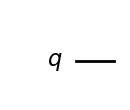

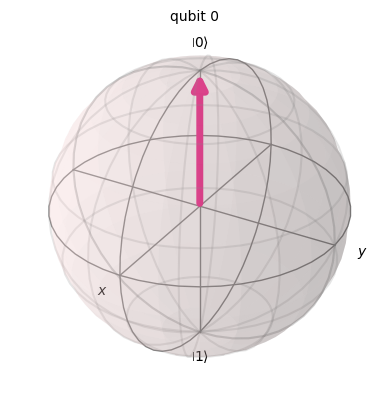

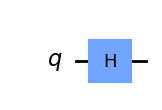

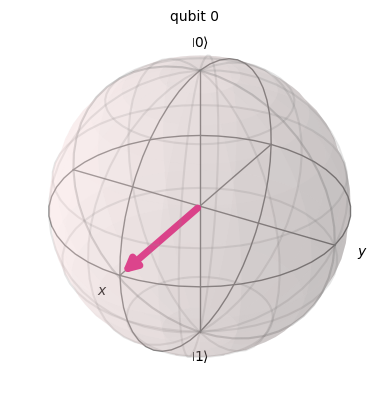

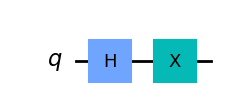

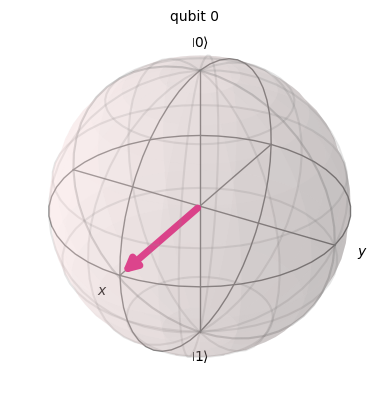

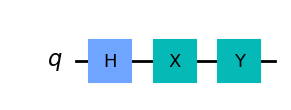

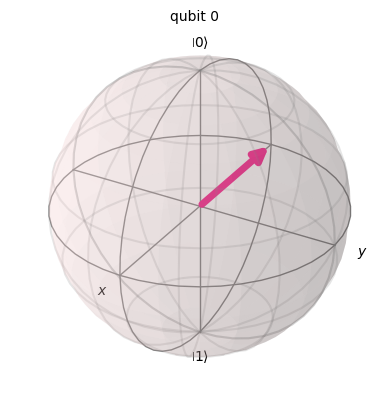

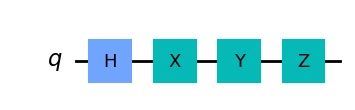

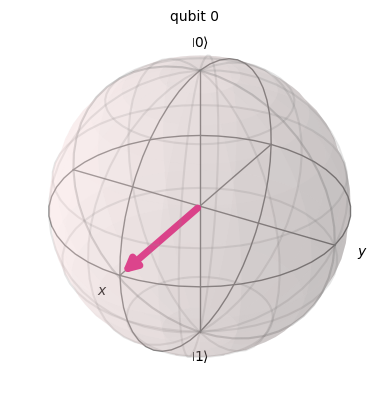

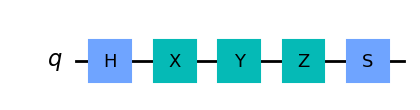

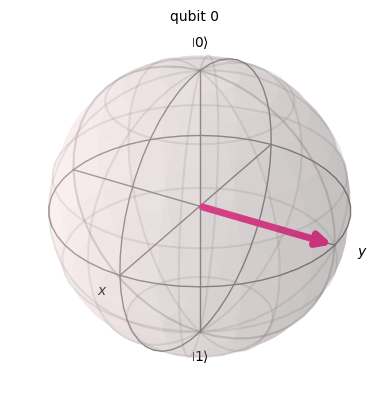

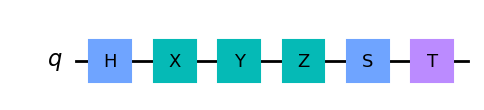

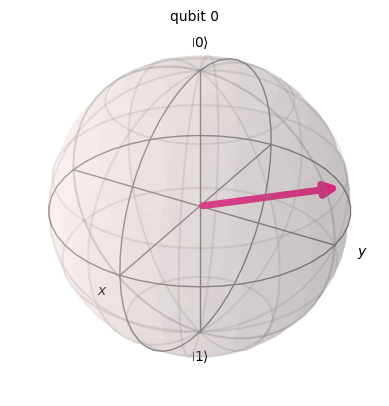

In [11]:
# Import necessary packages
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display

def visualize_circuit_on_bloch(circuit):
    # Use Aer's statevector simulator to get the state of the circuit
    simulator = Aer.get_backend('statevector_simulator')
    # Transpile the circuit for the simulator
    compiled_circuit = transpile(circuit, simulator)
    # Execute the circuit on the simulator
    result = simulator.run(compiled_circuit).result()
    # Get the statevector from the result
    statevector = result.get_statevector()
    # Visualize the statevector on a Bloch sphere
    return plot_bloch_multivector(statevector)

def visualize_circuit_and_state(circuit):
    # Visualize the quantum circuit
    display(circuit.draw('mpl'))
    # Visualize the state on the Bloch sphere
    display(visualize_circuit_on_bloch(circuit))

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Visualize the initial state and circuit (Should be |0⟩)
visualize_circuit_and_state(qc)

# Apply a Hadamard gate to the qubit
qc.h(0)
visualize_circuit_and_state(qc)

# Apply the Pauli-X (NOT) gate
qc.x(0)
visualize_circuit_and_state(qc)

# Apply the Pauli-Y gate
qc.y(0)
visualize_circuit_and_state(qc)

# Apply the Pauli-Z gate
qc.z(0)
visualize_circuit_and_state(qc)

# Apply the S gate
qc.s(0)
visualize_circuit_and_state(qc)

# Apply the T gate
qc.t(0)
visualize_circuit_and_state(qc)


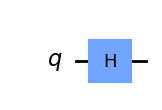

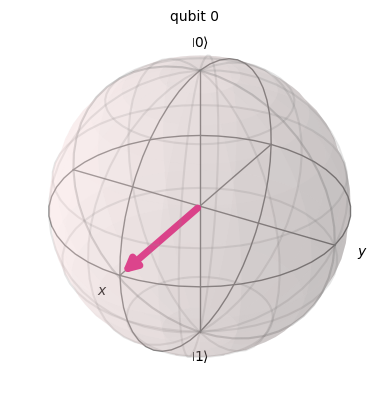

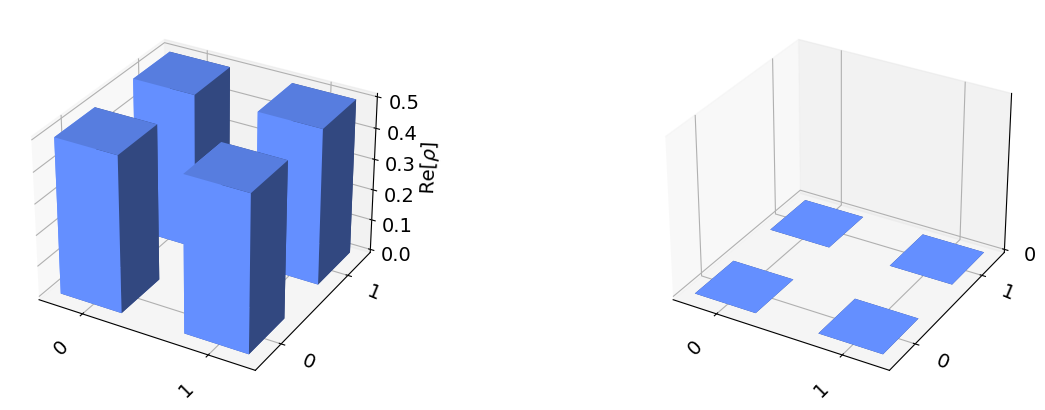

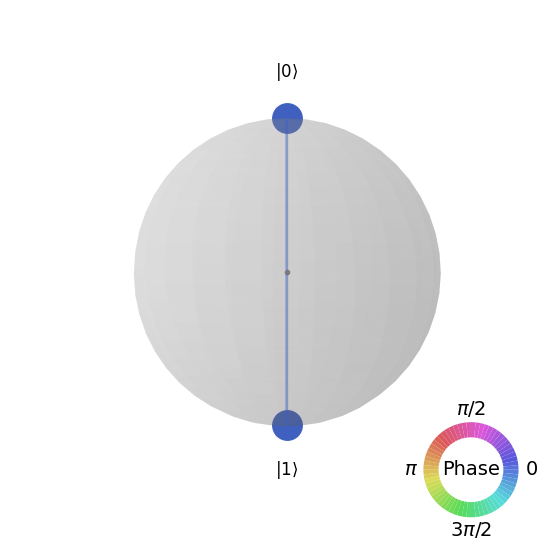

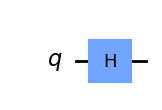

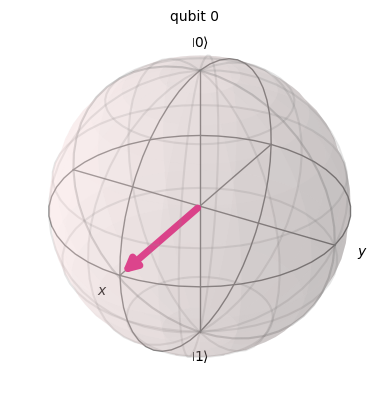

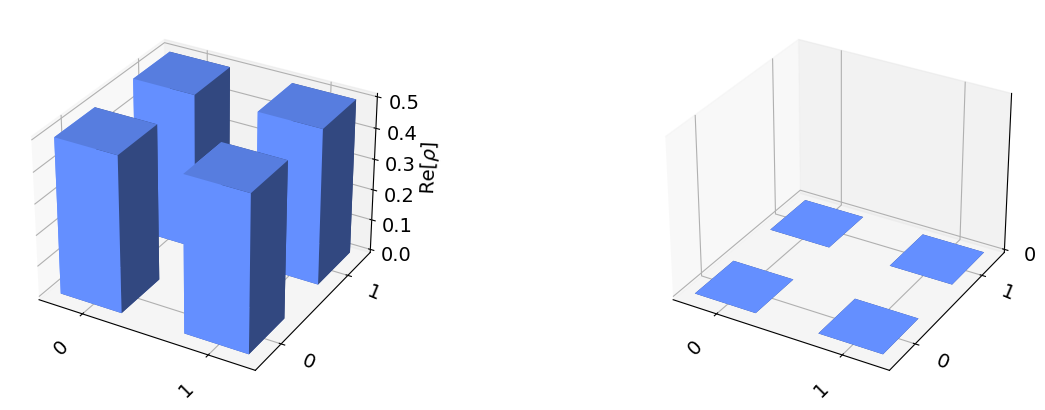

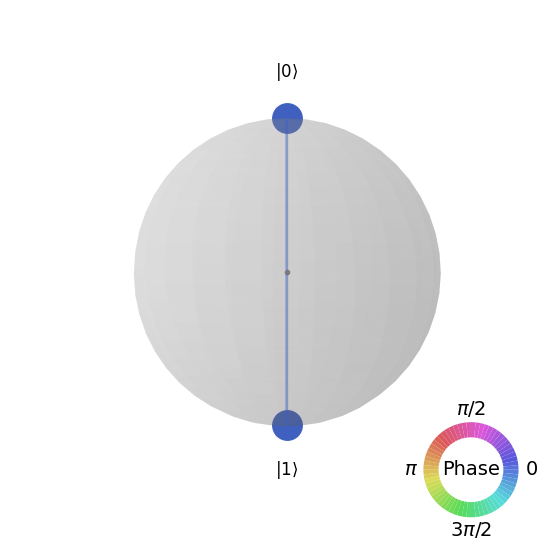

In [13]:
from qiskit.visualization import plot_state_city, plot_state_qsphere

def visualize_all(circuit):
    # Use Aer's statevector simulator to get the state of the circuit
    simulator = Aer.get_backend('statevector_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    statevector = result.get_statevector()
    
    # Visualize the quantum circuit
    display(circuit.draw('mpl'))
    # Bloch Sphere
    display(plot_bloch_multivector(statevector))
    # State City
    display(plot_state_city(statevector))
    # Q-Sphere (only shows up significantly for superpositions and entanglements)
    display(plot_state_qsphere(statevector))

# Create a quantum circuit with 1 qubit
qcc = QuantumCircuit(1)
visualize_all(qc)

# Apply a Hadamard gate
qcc.h(0)
visualize_all(qcc)


# Interpretation of Quantum State Visualizations

## State City Visualization

The provided visuals represent the "State City" visualizations of quantum states. These graphics showcase the real (`Re`) and imaginary (`Im`) components of a quantum state's state vector.

### Axes:
- **x-axis**: Corresponds to the basis states. For a single-qubit system, you'll encounter two basis states, |0⟩ and |1⟩. A two-qubit system would feature four: |00⟩, |01⟩, |10⟩, and |11⟩, and so forth.
- **y-axis**: Distinguishes between the real (`Re`) and imaginary (`Im`) segments of the state vector's components.
- **z-axis**: Indicates the magnitude of the real or imaginary segment for every basis state.

### Bars:
- The bar's height denotes the magnitude of the real or imaginary component of the state vector for each basis state.
- An upwards-extending bar signifies a positive component, while a downward one indicates a negative component.

### Visual Interpretation:
1. **Left Visualization**: 
   - Likely represents the state |0⟩. The real segment of the state vector for the basis state |0⟩ is at a magnitude of 1, with its imaginary part being 0 (indicated by the absence of a bar in the imaginary section for |0⟩).
   - For the |1⟩ basis state, both the real and imaginary segments are 0.
   
2. **Right Visualization**:
   - Possibly depicts the state after a Hadamard gate's application to the |0⟩ state, leading to a superposition.
   - Both |0⟩ and |1⟩ basis states exhibit non-zero real components of equal positive magnitude, suggesting a state of equal superposition. This aligns with the Hadamard gate's expected outcome on the |0⟩ state, which is `(1/sqrt(2))(|0⟩ + |1⟩)`.
   - The imaginary components for both basis states are absent.

---

# Implications of Absence of Imaginary Components in Quantum States

In quantum mechanics, complex numbers comprising both real and imaginary parts describe a quantum system's state. The presence or absence of these components can significantly affect the quantum state's attributes and behavior.

When a quantum state lacks "imaginary components," it means that its state vector's coefficients are purely real numbers without the imaginary unit \(i\) components (where \(i^2 = -1\)).

### Implications:
1. **Probability Amplitudes**: 
   - The likelihood of measuring a quantum state in a specific basis state derives from the squared magnitude of its coefficient. Regardless of whether the coefficient is real or complex, its magnitude is squared to derive the probability.

2. **Phase**:
   - Complex coefficients can introduce relative phases among basis states. These phases are vital in quantum algorithms and phenomena like interference. An absence of imaginary components means no relative phase gets introduced by the imaginary part.

3. **Simpler Mathematical Handling**: 
   - Real numbers are often more straightforward than complex numbers, especially when seeking analytical solutions or delivering intuitive explanations.

4. **Physical Interpretations**: 
   - In certain scenarios, the absence of an imaginary component could simplify the physical interpretations. In specific systems, a wave function's real and imaginary segments could relate to certain physically measurable quantities.

### Contextual Relevance:
In the context of the earlier visuals, the absence of imaginary components means that the quantum states are represented using only real coefficients. This simplifies the representation, ensuring that only the real parts need consideration during state analysis or interpretation. However, it's essential to remember that while certain situations or operations might allow quantum states to be represented without imaginary components, quantum mechanics' general formalism often necessitates complex numbers for a comprehensive description.
ate.

# Interpretation of Bloch Sphere Visualization

The provided image showcases a quantum state on a **Bloch sphere**.

The Bloch sphere is a graphical representation of a single qubit's quantum state:
- The **north pole** typically represents the |0⟩ state.
- The **south pole** corresponds to the |1⟩ state.
- Points on the **equator** signify qubit states in a superposition of |0⟩ and |1⟩.
- The **surface** of the sphere encompasses all possible states for a single qubit.

In the visual, the blue vector (often termed the **Bloch vector**) is pointing directly towards the north pole, indicating the |0⟩ state. This suggests that the qubit is entirely in the |0⟩ state, neither in a superposition nor the |1⟩ state.

**In essence, the image illustrates a qubit in the |0⟩ state.**


# Interpretation of Quantum Circuit and Phase Diagram

## Quantum Circuit:
The displayed quantum circuit comprises a single qubit, denoted as `q`, with a Hadamard gate (`H`) applied to it. The action of the Hadamard gate on a |0⟩ qubit produces a superposition:
\[ H|0⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) \]

## Phase Diagram:
The diagram to the right represents potential phase values for a quantum state, ranging between 0 to \(2\pi\). In the context of the Hadamard gate, the resulting state has no relative phase between the |0⟩ and |1⟩ components, implying a phase of 0. However, subsequent application of other gates can introduce a change in this phase value.

**Overall**, the visual demonstrates a qubit in a superposition state with no relative phase, achieved by the action of a Hadamard gate.


# Bloch Sphere Interpretation after Hadamard (H) Gate

The image showcases the state of a qubit on the **Bloch sphere** after the application of a Hadamard (H) gate to a qubit initially in the |0⟩ state.

**Hadamard Gate Action**:
\[ H|0⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) \]

**Bloch Sphere Visualization**:
- The resulting state is an equal superposition of |0⟩ and |1⟩.
- On the Bloch sphere, this state makes the Bloch vector point to a position on the equator, specifically between the x-axis and the y-axis, in the positive xy-plane.

The visualization is in line with the quantum state produced by the application of an H gate on a |0⟩ state, indicating the qubit is in a superposition with no relative phase between |0⟩ and |1⟩ components.


# Interpretation of State City Visualization for a Two-Qubit System

The provided visuals offer a State City representation of a quantum state for a two-qubit system, focusing on the real (`Re`) components of the state vector.

## Axes and Dimensions:

- **x-axis**: Represents the basis states: |00⟩, |01⟩, |10⟩, and |11⟩.
- **y-axis**: Denotes the real (`Re`) part of the state vector components.
- **z-axis** (only in the left visualization): Distinguishes between the two qubits in the system.

## Analysis:

1. **Left Visualization**: 
    - The bars' height conveys the magnitude of the real component for each basis state.
    - The state appears to be a mixture (or superposition) of all four basis states, given the significant real components for each.

2. **Right Visualization**:
    - A top-down perspective of the left visualization.
    - Allows for a clearer view of the relative magnitudes and positions of the components without the third dimension.

**Conclusion**: The two-qubit quantum system seems to be in a superposition of all its basis states, driven by the real components of the state vector.


# Bloch Sphere Interpretation for a Two-Qubit System

The presented image illustrates the state of a two-qubit system on a **Bloch sphere**.

On the Bloch sphere:
- The **north pole** designates the |0⟩ state.
- The **south pole** is representative of the |1⟩ state.
- The **equator** stands for qubits in superposition.

From the visual:
- One qubit appears to be in the |0⟩ state (evident by the vector pointing to the north pole).
- The other qubit seems to be in the |1⟩ state (evident by the vector pointing to the south pole).

**Conclusion**: The combined state of this two-qubit system is likely |01⟩. The notation |01⟩ indicates that the first qubit (often called the "most significant qubit") is in the |0⟩ state, and the second qubit (often called the "least significant qubit") is in the |1⟩ state. In essence, the first qubit is "off," and the second qubit is "on."


After Hadamard Gate:


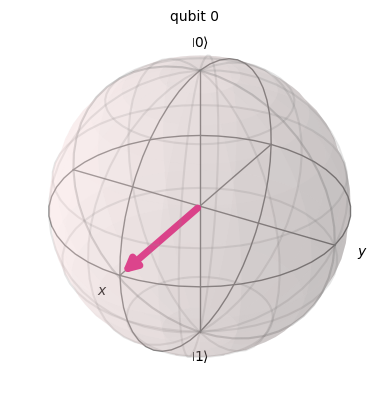

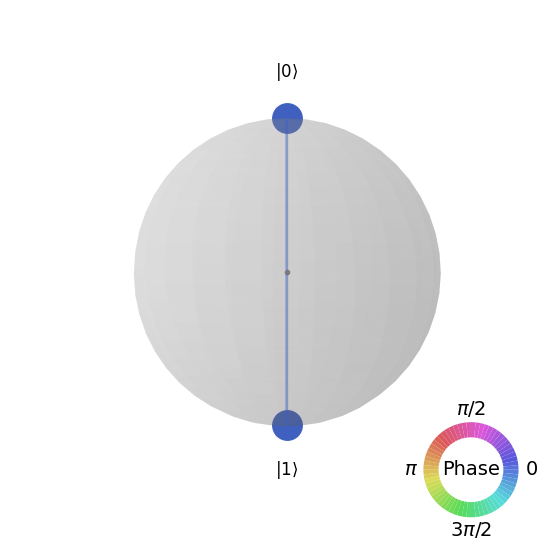

After S Gate:


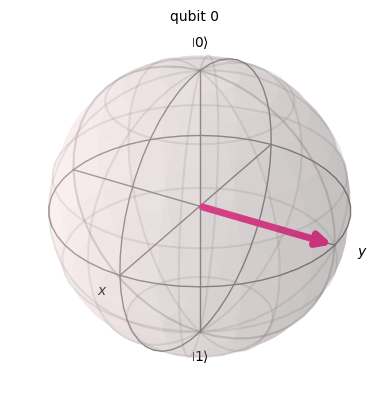

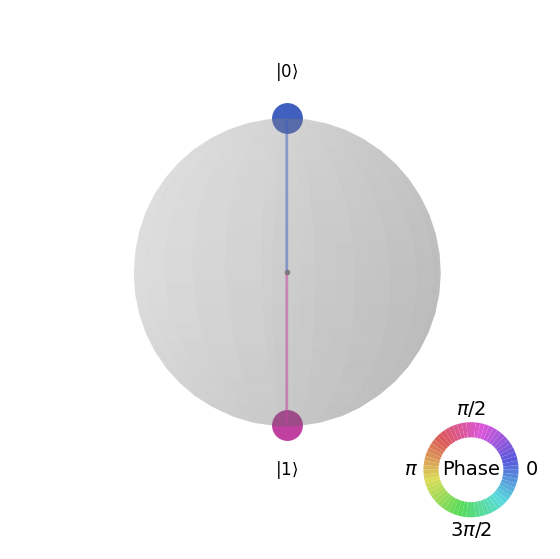

After T Gate:


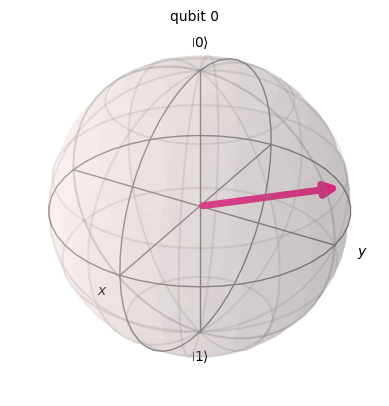

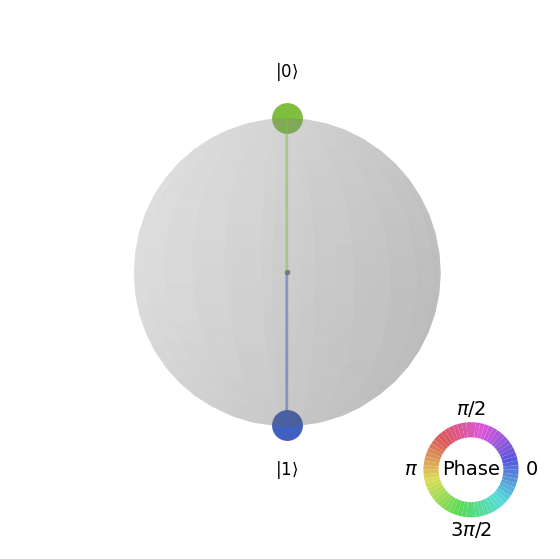

In [16]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit.providers.aer import StatevectorSimulator
from IPython.display import display

# Function to visualize the state
def visualize_state(circuit):
    # Use the statevector simulator
    simulator = Aer.get_backend('statevector_simulator')
    # Transpile the circuit for the simulator
    compiled_circuit = transpile(circuit, simulator)
    # Execute and get the statevector
    result = simulator.run(compiled_circuit).result()
    statevector = result.get_statevector()
    
    # Visualize on Bloch sphere and Q-sphere (for phase)
    bloch = plot_bloch_multivector(statevector)
    qsphere = plot_state_qsphere(statevector)
    
    # Display the visualizations immediately
    display(bloch)
    display(qsphere)

# Create the circuit with one qubit
quantum_circuit = QuantumCircuit(1)

# Apply the Hadamard gate and visualize
quantum_circuit.h(0)
print("After Hadamard Gate:")
visualize_state(quantum_circuit)

# Apply the S gate and visualize
quantum_circuit.s(0)
print("After S Gate:")
visualize_state(quantum_circuit)

# Apply the T gate and visualize
quantum_circuit.t(0)
print("After T Gate:")
visualize_state(quantum_circuit)


# Q-sphere Visualization Interpretation

The Q-sphere is a powerful tool for visualizing the amplitudes and phases of a quantum state, especially for multi-qubit systems.



## Key Features of the Q-sphere:

1. **Radius of the Sphere**: Represents the maximum amplitude a state can have, which is 1. 

2. **Dots on the Sphere**: Each dot on the Q-sphere represents a basis state (like |0⟩, |1⟩, |10⟩, etc.). 
   
    - The size of the dot is proportional to the probability amplitude of that state.
    
    - Its color represents the phase of the amplitude. The phase is depicted using the phase circle, with colors ranging from 0 to \(2\pi\).

3. **Poles of the Sphere**: The top pole often represents the |0⟩ state, while the bottom pole represents the |1⟩ state. As you add more qubits to your system, you'll have more dots at varying latitudes representing states like |00⟩, |01⟩, |10⟩, and |11⟩, and so on for larger systems.

## Interpretation:

From the Q-sphere visualization:

- The **top dot** indicates that there's a non-zero amplitude for the state |0⟩. The blue color means the phase is at 0.

- The **bottom dot** signifies the state |1⟩ also has a non-zero amplitude. Its color, purple, corresponds to a phase of \(\pi/2\), which is acquired after the application of the S gate.

Remember, the Q-sphere provides a comprehensive view of both the amplitude and phase of all possible states in your quantum system, making it invaluable for quantum computing tasks.




# Amplitude in Quantum Mechanics

Amplitude, within the domain of quantum mechanics and quantum computing, refers to the complex number linked with a quantum state when it's found in a superposition. This complex number provides valuable details about its probability and phase.

## Key Insights on Amplitude:

1. **Probability Amplitude**: Amplitude is a complex number. When you take its magnitude squared, it provides the probability of finding a quantum state in a specific basis state when measured.

2. **Phase Information**: The angle (or argument) of this complex number provides phase information about the quantum state.

3. **Superposition**: In quantum mechanics, particles like electrons exist in a superposition of states. The amplitude for each state tells us the likelihood (when squared) of finding the particle in that state upon measurement.

4. **Interference**: Amplitudes can interfere, both constructively and destructively. This interference phenomenon is crucial in quantum algorithms like Grover's and quantum phenomena like the double-slit experiment.

Remember, while classical bits are either in a state of 0 or 1, quantum bits (qubits) can be in a superposition of states, and the amplitude provides a way to understand and quantify this superposition.


# Initialization of Qubits in the \(|0\rangle\) State

When initializing a qubit in most quantum computing platforms, it typically begins in the \(|0\rangle\) state. This convention mirrors how classical bits usually default to '0'. 

## Reasons for the \(|0\rangle\) Initialization:

1. **Physical Implementation**: 
   - Many quantum systems associate the \(|0\rangle\) state with a lower energy level. Systems tend to naturally reside in this low energy state when not influenced by external factors. For instance, in superconducting qubits, the \(|0\rangle\) state might symbolize the absence of energy, while \(|1\rangle\) signifies a certain quantized energy level.

2. **Consistency with Classical Computing**: 
   - This convention forms a bridge from classical to quantum computing. As classical bits initialize to '0' by default, qubits start in the \(|0\rangle\) state.

3. **Standardization**: 
   - To maintain consistency across various quantum computing platforms, it's beneficial to standardize the initialization state.

4. **Simplicity**: 
   - For quantum computations to produce predictable results, it's vital to commence with a known state. Starting with an indeterminate or random state would lead to inconsistent outputs.

It's worth noting that while \(|0\rangle\) is the typical initialization state, the transformative power of quantum computing comes from the ability to manipulate qubits into superpositions and entangled states, a stark contrast to classical bits.

However, after initialization, the Pauli-X (or NOT) gate can swiftly convert the qubit to the \(|1\rangle\) state. The decision to initialize qubits to \(|0\rangle\) stems from both convention and practicality, rather than being a core principle of quantum mechanics.
